<div style="text-align: center; color:royalblue;">
    <h1>Project: Prediction of Natural Disaster Intensity in the United States 💥</h1>
    <h3>Using Hailstorm and Thunderstorm Wind data</h3>
    <h3 style="color:green;">Data history: 2006, 2018 - 2021</h3>
</div>

## Libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Configurations

In [41]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [42]:

base = "./Data/"
files = ["StormEvents_details-database_v1.0_d2006_c20210603",
"StormEvents_details-database_v1.0_d2018_c20210604",
"StormEvents_details-database_v1.0_d2019_c20210604",
"StormEvents_details-database_v1.0_d2020_c20210604",
"StormEvents_details-database_v1.0_d2021_c20210607"]

df_og = pd.concat([pd.read_csv(f"{base}{file}.csv") for file in files])
df_og.head()

/var/folders/n4/svjj74s128b2vwmpr1ld21nr0000gn/T/ipykernel_26828/1814866143.py:8: DtypeWarning: Columns (29,34,35,37,48,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df_og = pd.concat([pd.read_csv(f"{base}{file}.csv") for file in files])


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_TITLE,EPISODE_NARRATIVE,EVENT_NARRATIVE,LAST_MOD_DATE,LAST_MOD_TIME,LAST_CERT_DATE,LAST_CERT_TIME,LAST_MOD,LAST_CERT,ADDCORR_FLG,ADDCORR_DATE,DATA_SOURCE
0,200604,7,1515,200604,7,1515,1207534,5501658,INDIANA,18,2006,April,Thunderstorm Wind,C,51,GIBSON,PAH,07-APR-06 15:15:00,CST,07-APR-06 15:15:00,0,0,0,0,60K,NaN,GENERAL PUBLIC,61.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,E,PATOKA,NaN,NaN,OAKLAND CITY,38.42,-87.52,38.33,-87.35,NaN,NaN,"At Wheeling, the windows were blown out of a c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDS
1,200601,1,0,200601,31,2359,1202408,5482463,COLORADO,8,2006,January,Drought,Z,2,CENTRAL YAMPA RIVER BASIN,GJT,01-JAN-06 00:00:00,MST,31-JAN-06 23:59:00,0,0,0,0,NaN,NaN,GOVT OFFICIAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The storm track favored northwest Colorado wit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDS
2,200601,1,0,200601,31,2359,1202408,5482464,COLORADO,8,2006,January,Drought,Z,7,DEBEQUE TO SILT CORRIDOR,GJT,01-JAN-06 00:00:00,MST,31-JAN-06 23:59:00,0,0,0,0,NaN,NaN,GOVT OFFICIAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The storm track favored northwest Colorado wit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDS
3,200601,1,0,200601,31,2359,1202408,5482465,COLORADO,8,2006,January,Drought,Z,4,ELKHEAD AND PARK MOUNTAINS,GJT,01-JAN-06 00:00:00,MST,31-JAN-06 23:59:00,0,0,0,0,NaN,NaN,GOVT OFFICIAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The storm track favored northwest Colorado wit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDS
4,200601,1,0,200601,31,2359,1202408,5482466,COLORADO,8,2006,January,Drought,Z,13,FLATTOP MOUNTAINS,GJT,01-JAN-06 00:00:00,MST,31-JAN-06 23:59:00,0,0,0,0,NaN,NaN,GOVT OFFICIAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The storm track favored northwest Colorado wit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDS


## Functions created

In [43]:
def df_metrics(df):
    '''
Cette fonction renvoi:
Le taux de valeurs non-nulles par variable
Le nombre de valeurs non-nulles par variable
Le taux de valeurs par variable
    '''
    fill_rate = df.notna().mean() * 100 
    num_values = df.count()
    na_rate = df.isna().mean() * 100 

    metrics_df = pd.DataFrame({
        'Fill Rate (%)': fill_rate,
        'Number of Values': num_values,
        'NA Rate (%)': na_rate
    }).sort_values(by =["Fill Rate (%)"], ascending=False)
    return metrics_df

In [44]:
def impute_columns(df, columns, group_by):
    for column in columns:
        if df[column].dtype == 'object':  
            df[column] = df.groupby(group_by, as_index=False)[column].apply(lambda x: x.fillna(x.mode()[0])).droplevel([0])
        else: 
            df[column] = df.groupby(group_by, as_index=False)[column].apply(lambda x: x.fillna(x.median())).droplevel([0])
    return df

## Data Preparation
+ We see that we do not have sufficient data of `MAGNITUDE` for prediction. We will filter only `HAIL` and `THUNDERSTORM` type of natural disaster for the prediction.

In [45]:
df_og["EVENT_TYPE"].value_counts()

EVENT_TYPE
Thunderstorm Wind             66580
Hail                          41282
Winter Weather                15572
Flash Flood                   14789
High Wind                     14400
Flood                         13945
Winter Storm                  12905
Heavy Snow                     9679
Drought                        9065
Marine Thunderstorm Wind       8683
Heavy Rain                     5688
Tornado                        5521
Heat                           5358
Strong Wind                    5169
Dense Fog                      3243
Frost/Freeze                   2740
Extreme Cold/Wind Chill        2659
Blizzard                       2483
Cold/Wind Chill                2110
Excessive Heat                 2077
High Surf                      1997
Lightning                      1833
Wildfire                       1444
Funnel Cloud                   1333
Tropical Storm                 1322
Ice Storm                      1073
Coastal Flood                  1010
Waterspout       

In [46]:
df = df_og.loc[df_og["EVENT_TYPE"].isin(["Thunderstorm Wind", "Hail"])].reset_index(drop = True)

#### Descriptive Statistics of Columns (A)

In [47]:
metrics = df_metrics(df)
metrics.sort_values(by = 'NA Rate (%)', ascending = False)

,Fill Rate (%),Number of Values,NA Rate (%)
CATEGORY,0.000000,0,100.000000
TOR_OTHER_CZ_NAME,0.000000,0,100.000000
TOR_OTHER_WFO,0.000000,0,100.000000
TOR_WIDTH,0.000000,0,100.000000
TOR_LENGTH,0.000000,0,100.000000
TOR_F_SCALE,0.000000,0,100.000000
FLOOD_CAUSE,0.000000,0,100.000000
TOR_OTHER_CZ_FIPS,0.000000,0,100.000000
TOR_OTHER_CZ_STATE,0.000000,0,100.000000
ADDCORR_FLG,19.141125,20646,80.858875


#### Dropping the following columns
+ Values with Null rate >80%:
   `CATEGORY, TOR_OTHER_WFO, TOR_OTHER_CZ_STATE, TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME, TOR_WIDTH, TOR_LENGTH, TOR_F_SCALE,FLOOD_CAUSE, ADDCORR_FLG, ADDCORR_DATE`
+ Values dropped representing future events representing the results of magnitude intensity: `DAMAGE_CROPS, DAMAGE_PROPERTY, DEATHS_INDIRECT, DEATHS_DIRECT, INJURIES_INDIRECT, INJURIES_DIRECT`

+ Values not required: `LAST_MOD, MAGNITUDE_TYPE, EVENT_NARRATIVE, EPISODE_TITLE, LAST_MOD_TIME, LAST_CERT_DATE, LAST_CERT_TIME, LAST_CERT, LAST_MOD_DATE, EPISODE_NARRATIVE, BEGIN_DAY, SOURCE, DATA_SOURCE, END_DAY, YEAR, EVENT_ID, END_YEARMONTH, EPISODE_ID, END_TIME, BEGIN_TIME, BEGIN_YEARMONTH`	



In [48]:
cols_dropped = ["EPISODE_ID",
                "EVENT_ID",
                  "EPISODE_NARRATIVE",
                  "CATEGORY",
                  "TOR_OTHER_CZ_NAME",
                  "TOR_OTHER_CZ_FIPS",
                  "TOR_OTHER_CZ_STATE",
                  "TOR_OTHER_WFO",
                  "TOR_LENGTH",
                  "TOR_WIDTH",
                  "TOR_F_SCALE",
                  "FLOOD_CAUSE",
                  "DAMAGE_PROPERTY",
                  "LAST_CERT",
                  "EVENT_NARRATIVE",
                  "LAST_CERT_TIME",
                  "LAST_CERT_DATE",
                  "LAST_MOD",
                  "ADDCORR_DATE",
                  "ADDCORR_FLG",
                  "DAMAGE_CROPS",
                  "MAGNITUDE_TYPE",
                  "LAST_MOD_DATE",
                  "EPISODE_TITLE",
                  "LAST_MOD_TIME",
                  "DATA_SOURCE",
                  "SOURCE",
                  "INJURIES_DIRECT",
                  "INJURIES_INDIRECT",
                  "DEATHS_DIRECT",
                  "DEATHS_INDIRECT",
                  "YEAR",
                  "BEGIN_DAY",
                  "BEGIN_TIME",
                  "BEGIN_YEARMONTH",
                  "END_DAY",
                  "END_TIME",
                  "END_YEARMONTH",
                  "BEGIN_LON",
                  "BEGIN_LAT",
                  "END_LON",
                  "END_LAT"
                  ]

In [49]:
df = df.drop(cols_dropped, axis=1)

In [50]:
print("New shape of data:\n" f"{df.shape}", "\nRemaining Columns:\n" f"{df.columns}")

New shape of data:
(107862, 18) 
Remaining Columns:
Index(['STATE', 'STATE_FIPS', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS',
       'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'MAGNITUDE', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION',
       'END_RANGE', 'END_AZIMUTH', 'END_LOCATION'],
      dtype='object')


#### Descriptive Statistics of Columns (B)

In [51]:
df_metrics(df)

,Fill Rate (%),Number of Values,NA Rate (%)
STATE,100.000000,107862,0.000000
WFO,100.000000,107862,0.000000
BEGIN_LOCATION,100.000000,107862,0.000000
MAGNITUDE,100.000000,107862,0.000000
END_DATE_TIME,100.000000,107862,0.000000
STATE_FIPS,100.000000,107862,0.000000
BEGIN_DATE_TIME,100.000000,107862,0.000000
CZ_TIMEZONE,100.000000,107862,0.000000
CZ_NAME,100.000000,107862,0.000000
CZ_FIPS,100.000000,107862,0.000000


#### Imputation of missing values
+ `BEGIN_AZIMUTH, END_AZIMUTH, BEGIN_RANGE, END_RANGE` are the values that needs to be handled.
+ `BEGIN_RANGE` and `END_RANGE` imputed using the median grouped by `STATE` and `EVENT_TYPE`.
+ `BEGIN_AZIMUTH` and `END_AZIMUTH` are imputed using the most frequent direction (Mode) by `STATE` and `EVENT_TYPE`.

In [52]:
columns_to_impute = ['BEGIN_RANGE', 'END_RANGE', 'BEGIN_AZIMUTH', 'END_AZIMUTH']
group_by = ['STATE', 'EVENT_TYPE']
df = impute_columns(df, columns_to_impute, group_by)

#### Converting the date time to EST time zone

In [53]:
df["CZ_TIMEZONE"].value_counts()

CZ_TIMEZONE
CST-6     38693
EST-5     30197
CST       16376
EST       10561
MST-7      9111
MST        2092
PST-8       501
PST         294
AST-4        17
AST           9
AKST-9        4
HST           3
HST-10        3
GST10         1
Name: count, dtype: int64

In [54]:
def convert_to_utc(row, column):
    local_tz = pytz.timezone(timezone_mapping[row['CZ_TIMEZONE']])
    local_time = pd.Timestamp(row[column]).tz_localize(local_tz)
    return local_time.astimezone(pytz.utc)

#### Descriptive Statistics of Columns (C) - After imputation

In [55]:
df_metrics(df)

,Fill Rate (%),Number of Values,NA Rate (%)
STATE,100.0,107862,0.0
STATE_FIPS,100.0,107862,0.0
END_AZIMUTH,100.0,107862,0.0
END_RANGE,100.0,107862,0.0
BEGIN_LOCATION,100.0,107862,0.0
BEGIN_AZIMUTH,100.0,107862,0.0
BEGIN_RANGE,100.0,107862,0.0
MAGNITUDE,100.0,107862,0.0
END_DATE_TIME,100.0,107862,0.0
CZ_TIMEZONE,100.0,107862,0.0


#### Data insights
+ North Dakota,Kansas and Montana are the 3 states that are hit with the strongest damages of Hail and WeatherStorm
+ Puerto Rico, Hawaii, Guam are the 3 states that are hit with the lowest intensity of damages in average magnitude

/Users/abedelzubaidi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


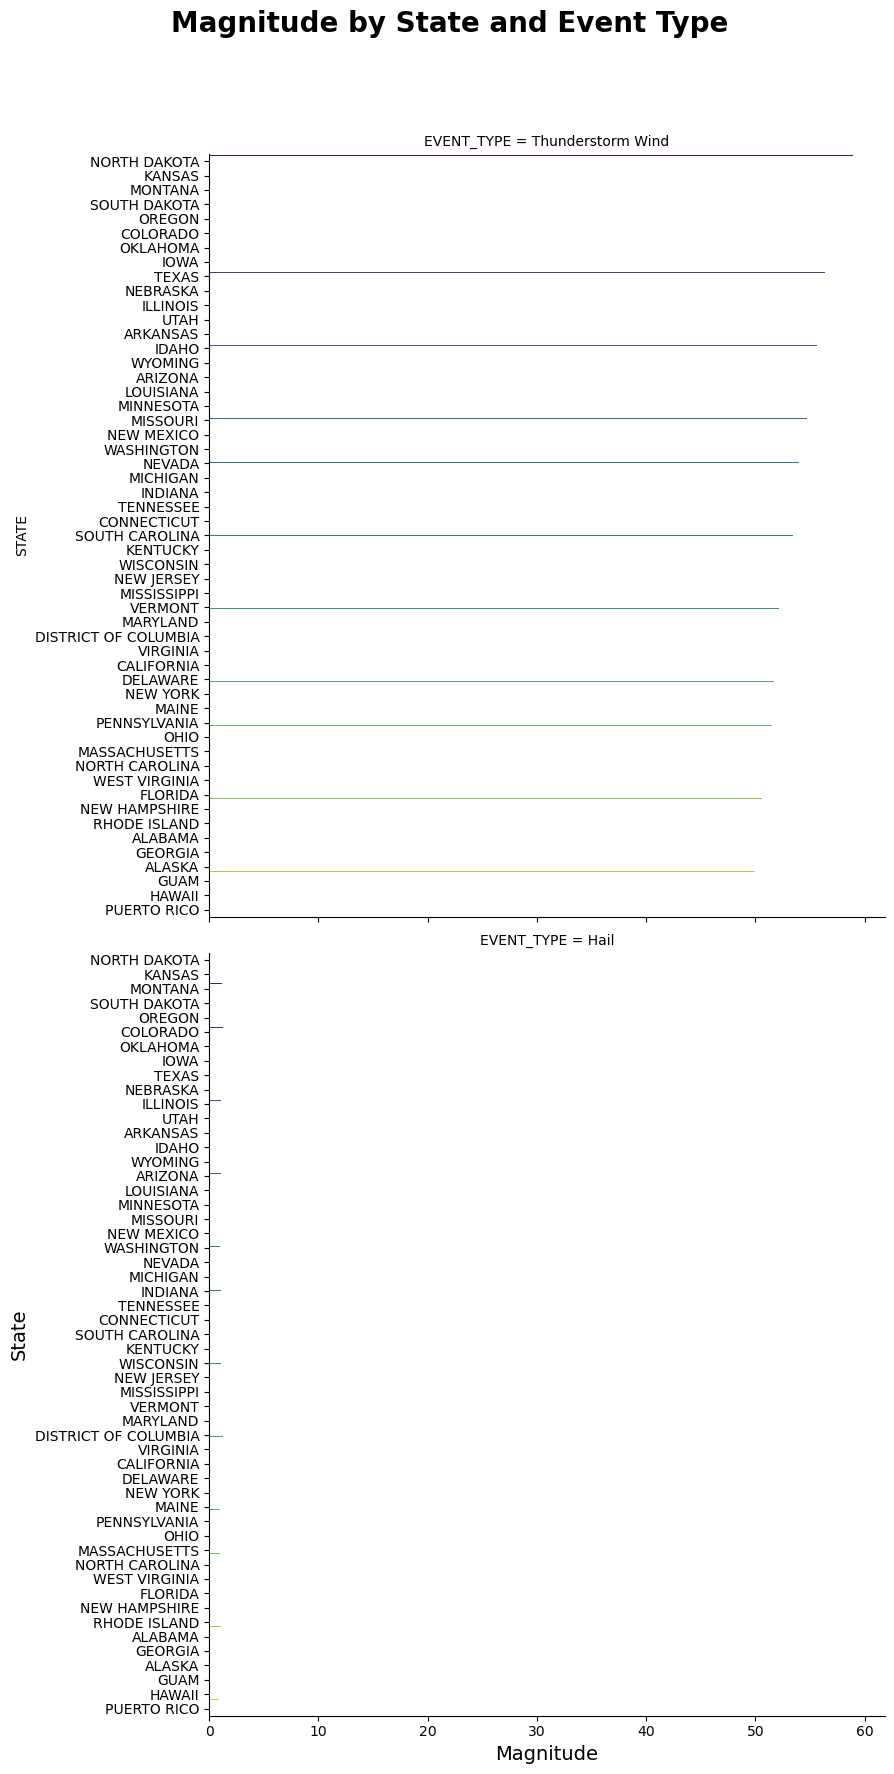

In [56]:
sorted_data = df.groupby(['EVENT_TYPE', 'STATE'], as_index=False)['MAGNITUDE'].mean().sort_values(by = "MAGNITUDE", ascending=False)
sns.catplot(
    data=sorted_data,
    y="STATE",
    hue="STATE",
    x="MAGNITUDE",           
    col="EVENT_TYPE",        
    kind="bar",             
    height=9,               
    aspect=1,             
    palette="viridis",       
    errorbar=None,
    legend = False,
    col_wrap=1
)
plt.subplots_adjust(top=0.9)  
plt.suptitle("Magnitude by State and Event Type", fontsize=20, fontweight='bold')
plt.xlabel("Magnitude", fontsize=14)
plt.ylabel("State", fontsize=14)
plt.show()

#### Feature Engineering
+ We create columns that represents more useful data injected in our Machine Learning algorithms.

In [57]:
df["BEGIN_DATE_TIME"] = pd.to_datetime(df["BEGIN_DATE_TIME"], format='%d-%b-%y %H:%M:%S')
df["END_DATE_TIME"] = pd.to_datetime(df["END_DATE_TIME"], format='%d-%b-%y %H:%M:%S')

In [58]:
df["DISASTER_DURATION"] = (df["END_DATE_TIME"] - df["BEGIN_DATE_TIME"]).dt.total_seconds() / 3600 # Extracting hours